In [1]:
import os
from os import walk, path

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure

# import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [2]:
### rename original filename and move to "total" folder

f_filelist = []
for root, dirs, files in walk(r'.'):
#     print(root)
#     print(dirs)
#     print(files)
    
    for file in files:
        pathSplit = root.split(os.sep)
#         print(pathSplit)
        if 'f_deviceData' in file:
            os.rename(path.join(root,file), f'total/{pathSplit[1]}_f_{pathSplit[2]}.csv')
            

In [3]:
### each sensor filename list ready

sensor1_list = []
sensor2_list = []
sensor4_list = []
sensor10_list = []
sensor11_list = []
sensor13_list = []
sensor14_list = []

for root, dirs, files in walk(r'.\total'):
#     print([i for i in sensor1_list if 'sensor1' not in i])
    for file in files:
        if 'sensor1_' in file:
            sensor1_list.append(path.join(root, file))
        elif 'sensor2' in file:
            sensor2_list.append(path.join(root, file))
        elif 'sensor4' in file:
            sensor4_list.append(path.join(root, file))
        elif 'sensor10' in file:
            sensor10_list.append(path.join(root, file))
        elif 'sensor11' in file:
            sensor11_list.append(path.join(root, file))
        elif 'sensor13' in file:
            sensor13_list.append(path.join(root, file))
        elif 'sensor14' in file:
            sensor14_list.append(path.join(root, file))

print(sensor4_list)

['.\\total\\sensor4_f_20200908T094108.csv', '.\\total\\sensor4_f_20200908T094141.csv', '.\\total\\sensor4_f_20200908T094210.csv', '.\\total\\sensor4_f_20200908T094239.csv']


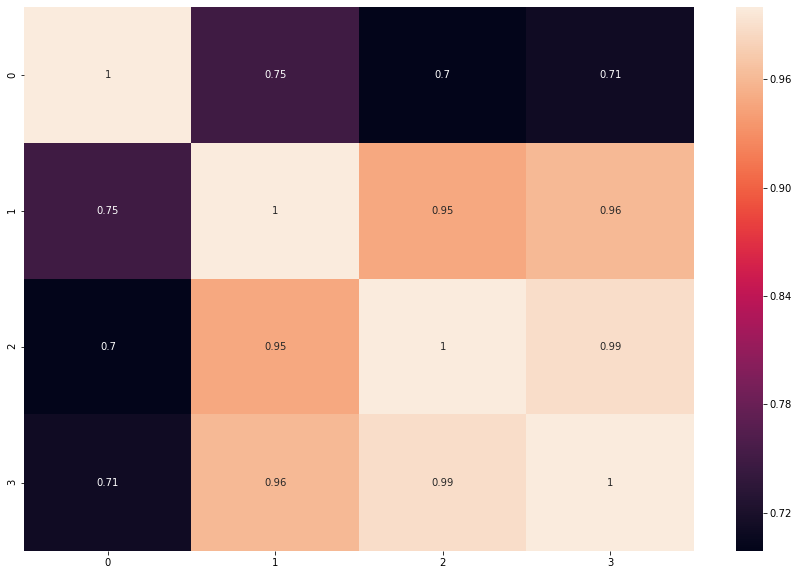

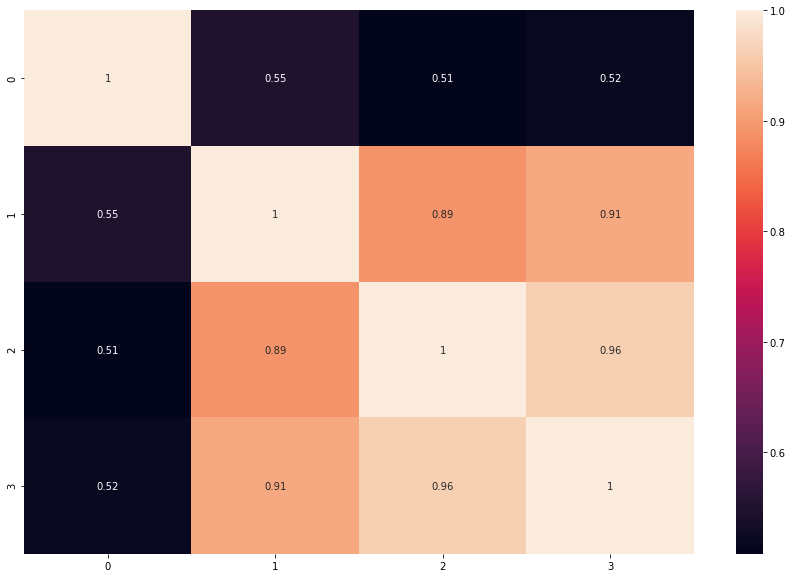

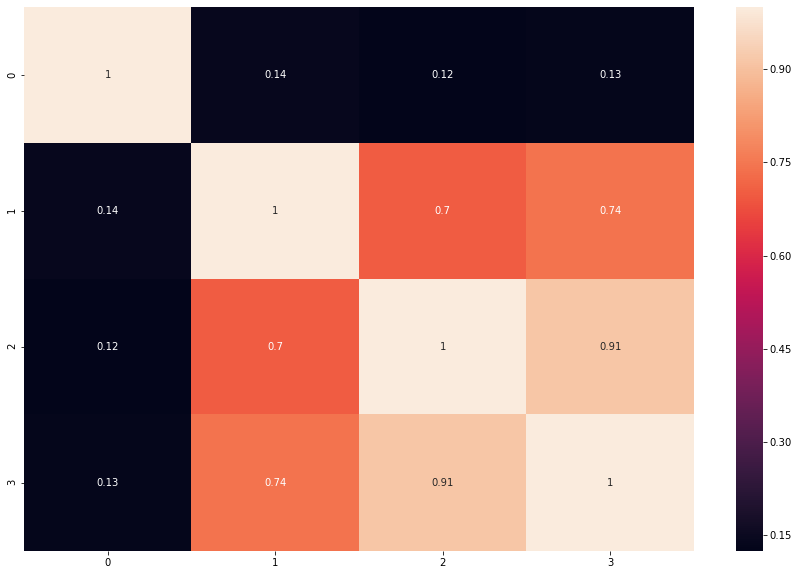

In [4]:
### read csv into dataframe

def sensor_self_correlation(sensorFilePathList):
    df_x = pd.DataFrame()
    df_y = pd.DataFrame()
    df_z = pd.DataFrame()
    
    for file in sensorFilePathList:
        df = pd.read_csv(file)
    
        df_transpose = df.transpose()
        df_x = df_x.append(df_transpose.loc['x'])
        df_y = df_y.append(df_transpose.loc['y'])
        df_z = df_z.append(df_transpose.loc['z'])
    
    result_x = np.corrcoef(df_x)
    result_y = np.corrcoef(df_y)
    result_z = np.corrcoef(df_z)
    
    return result_x, result_y, result_z

corr_x, corr_y, corr_z = sensor_self_correlation(sensor14_list)
#     return set1_df, set2_df, set3_df, set4_df, set5_df
plt.figure(figsize=(15, 10))
sns.heatmap(corr_x, annot=True) #All
plt.savefig(r'.\pics\14\x.png')
# plt.show()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_y, annot=True) #All
plt.savefig(r'.\pics\14\y.png')
# plt.show()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_z, annot=True) #All
plt.savefig(r'.\pics\14\z.png')
# plt.show()


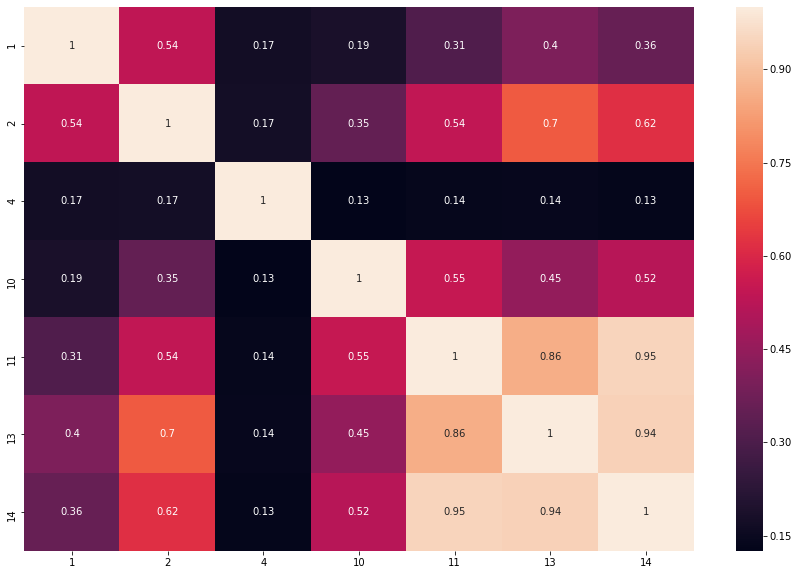

In [5]:
### read csv into dataframe

def sensor_multi_correlation(*sensorFilePathList, axis='x'):
    df_result = pd.DataFrame()
    
    for idx in range(len(sensorFilePathList)):
        df = pd.read_csv(sensorFilePathList[idx][2])
        df_transpose = df.transpose()
        
        df_result = df_result.append(df_transpose.loc[axis])
    
    result = np.corrcoef(df_result)
    return result

corr = sensor_multi_correlation(sensor1_list, sensor2_list, sensor4_list, sensor10_list, sensor11_list, sensor13_list, sensor14_list, axis='z')
plt.figure(figsize=(15, 10))
sns.heatmap(corr, xticklabels=['1', '2', '4', '10', '11', '13', '14'], yticklabels=['1', '2', '4', '10', '11', '13', '14'], annot=True) #All
plt.savefig(r'.\pics\total\z.png')
plt.show()